# **<span style="color:red">Midterm Solutions</span>**

## FINM 25000 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# Instructions

## Please note the following:

Submission
* You will upload your solution to the `Midterm` assignment on Canvas, where you downloaded this. 
* Be sure to **submit** on Canvas, not just **save** on Canvas.
* Your submission should be readable, (the graders can understand your answers,)
* and it should **include all code used in your analysis in a file format that the code can be executed.** 

Rules
* The exam is open-material, closed-communication.
* You do not need to cite material from the course github repo--you are welcome to use the code posted there without citation.
* If you prompt AI for help, you must cite the AI and the prompt. If you use AI embedded coding tools, cite that you used such tools.

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.
* The exam will be graded for partial credit.

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 45     |
| 2       | 40     |
| 3       | 35     |


Each numbered question is worth `5 points` unless otherwise specified.

For every minute late you submit the exam, you will lose `1 point`.

***

## Data

**All data files are found in the class github repo, in the `data` folder.**

This exam makes use of the following data files:
* `midterm_1_data.xlsx`

This file has sheets for...
* `excess returns` - excess returns of some of the biggest companies in the S&P, along with the SPY ETF.

Note the data is **weekly**, so annualization should use a factor of `52`.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, '../cmds')
from portfolio import performanceMetrics, maximumDrawdown, get_ols_metrics

In [2]:
DATAFILE = '../data/midterm_data.xlsx'
SHEET_INFO = 'info'
FREQ = 52

In [3]:
info = pd.read_excel(DATAFILE,sheet_name=SHEET_INFO)
info.set_index('ticker',inplace=True)

In [4]:
rets = pd.read_excel(DATAFILE,sheet_name='excess returns')
rets.set_index('date',inplace=True)
rets.columns = [s.split(' ')[0] for s in rets.columns]
rets = rets[info.index]

In [5]:
info

,shortName,quoteType,currency,volume,totalAssets,longBusinessSummary
ticker,,,,,,
SPY,SPDR S&P 500,ETF,USD,63670226,6.035170e+11,The trust seeks to achieve its investment obje...
AAPL,Apple Inc.,EQUITY,USD,39765812,NaN,"Apple Inc. designs, manufactures, and markets ..."
NVDA,NVIDIA Corporation,EQUITY,USD,193633263,NaN,"NVIDIA Corporation, a computing infrastructure..."
MSFT,Microsoft Corporation,EQUITY,USD,16459512,NaN,Microsoft Corporation develops and supports so...
GOOGL,Alphabet Inc.,EQUITY,USD,34282922,NaN,Alphabet Inc. offers various products and plat...
AMZN,"Amazon.com, Inc.",EQUITY,USD,50518307,NaN,"Amazon.com, Inc. engages in the retail sale of..."
META,"Meta Platforms, Inc.",EQUITY,USD,10873880,NaN,"Meta Platforms, Inc. engages in the developmen..."
TSLA,"Tesla, Inc.",EQUITY,USD,79236442,NaN,"Tesla, Inc. designs, develops, manufactures, l..."
AVGO,Broadcom Inc.,EQUITY,USD,14274674,NaN,"Broadcom Inc. designs, develops, and supplies ..."


In [6]:
rets

,SPY,AAPL,NVDA,MSFT,GOOGL,AMZN,META,TSLA,AVGO,BRK-B,LLY
date,,,,,,,,,,,
2015-01-09,-0.005925,0.024332,-0.009620,0.009014,-0.054624,-0.037748,-0.009232,-0.057862,0.047875,0.001830,-0.002037
2015-01-16,-0.013009,-0.053927,0.000822,-0.020313,0.019271,-0.021028,-0.033112,-0.065942,-0.010477,-0.001921,0.010544
2015-01-23,0.016565,0.065950,0.037575,0.020329,0.061689,0.074465,0.035249,0.042575,0.030437,-0.000603,0.020515
2015-01-30,-0.026840,0.037088,-0.072821,-0.143614,-0.008028,0.134986,-0.024578,0.011567,-0.038234,-0.034848,-0.001712
2015-02-06,0.030493,0.015017,0.062409,0.049662,-0.006918,0.055617,-0.019061,0.067493,0.017989,0.043478,-0.022868
...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30,0.017208,0.028032,0.028705,0.022070,0.018866,0.019457,0.032037,0.020438,0.057825,0.000450,0.033027
2025-06-06,0.019350,0.018092,0.051575,0.024573,0.014103,0.044561,0.080368,-0.145320,0.022884,-0.017889,0.046472
2025-06-13,-0.004571,-0.037631,0.000765,0.008738,0.004701,-0.007882,-0.022268,0.101224,0.006169,-0.013136,0.063271


***

# 1. Risk Statistics and Decomposition

### 1.1. (10pts)

Display a table with the following metrics for each of the return series.

* mean (annualized)
* volatility (annualized)
* Sharpe ratio (annualized)
* skewness
* kurtosis
* maximum drawdown

### 1.2.

As a standalone investment, which is most attractive? And least? Justify your answer.

### 1.3. (10pts)

For each investment, estimate a regression against `SPY`. Report the 
* alpha (annualized as a mean)
* beta
* info ratio
* r-squared

### 1.4.

Based on this table, which investment seems most attractive relative to holding `SPY`? Justify your answer.

### 1.5.

Suppose you expect `AAPL` to do well relatively, but you want to hedge broad market risk (`SPY`) and A.I. risk (`NVDA`). 

For every $100 in `AAPL`, what should you hold in `SPY` and `NVDA`?

Estimate the regression including an intercept.

### 1.6.

Without estimating anything new, consider the idea of replicating `AAPL` using `SPY`, and `NVDA`. Which regression statistic best indicates if your replication tracks the target well?

### 1.7.

In the ProShares case, did we find the attempts at hedge-fund replication were successful?

Specifically, did we achieve high **correlation** to the...
* Merril Lynch Benchmark?
* HFRI Index?

Were there any drawbacks to using our replication rather than the direct product?


***

# **<span style="color:red">Solution 1</span>**

### **<span style="color:red">Solution 1.1.</span>**

In [7]:
mets = performanceMetrics(rets,annualization=FREQ)
mets['skewness'] = rets.skew()
mets['kurtosis'] = rets.kurtosis()
mets['max drawdown'] = maximumDrawdown(rets)['Max Drawdown']
mets

,Mean,Vol,Sharpe,Min,Max,skewness,kurtosis,max drawdown
SPY,0.118939,0.171315,0.694271,-0.151896,0.120735,-0.627808,6.363700,-0.325741
AAPL,0.227994,0.276003,0.826057,-0.176750,0.147240,-0.214185,1.852149,-0.348104
NVDA,0.653633,0.461871,1.415184,-0.201059,0.302634,0.336949,1.391086,-0.657787
MSFT,0.253320,0.239516,1.057631,-0.143614,0.150259,0.066817,2.372360,-0.350826
GOOGL,0.220044,0.279465,0.787376,-0.121729,0.257970,0.572854,3.673239,-0.415141
AMZN,0.300886,0.305453,0.985051,-0.144492,0.185254,0.061550,1.754491,-0.545830
META,0.274415,0.352006,0.779574,-0.237346,0.243940,0.062078,3.990455,-0.758756
TSLA,0.462420,0.586525,0.788407,-0.259969,0.332566,0.535479,1.585674,-0.721138
AVGO,0.382419,0.375069,1.019597,-0.182846,0.251433,0.639696,3.515656,-0.409481
BRK-B,0.130218,0.189958,0.685508,-0.135557,0.098451,-0.199913,2.608872,-0.266894


### **<span style="color:red">Solution 1.2.</span>**

As a standalone investment, `NVDA` has
* the best Sharpe, which is the best vol-adjusted return.
* large **positive** skewness which is attractive.
* large kurtosis, which would be bad with negative skewness but is appealing with positive skewness.
* a large max drawdown.

If worried about the max drawdown, `LLY` may be a good choice.
* smallest max drawdown
* still has 4th hgihest Sharpe.

### **<span style="color:red">Solution 1.3.</span>**

In [8]:
get_ols_metrics(rets['SPY'],rets,FREQ)

,alpha,SPY,r-squared,Treynor Ratio,Info Ratio
SPY,0.000000,1.000000,1.000000,0.118939,None
AAPL,0.096511,1.105465,0.470818,0.206243,0.480686
NVDA,0.449431,1.716860,0.405526,0.380714,1.262048
MSFT,0.131683,1.022681,0.535057,0.247702,0.806298
GOOGL,0.093870,1.060832,0.422891,0.207426,0.44215
AMZN,0.174753,1.060484,0.353762,0.283726,0.711681
META,0.137196,1.153691,0.315260,0.237858,0.471008
TSLA,0.258016,1.718565,0.251971,0.269073,0.508628
AVGO,0.221165,1.355773,0.383480,0.282067,0.750985
BRK-B,0.033790,0.810733,0.534602,0.160617,0.260746


### **<span style="color:red">Solution 1.4.</span>**

Two possible answers:

Based on this table, `NVDA` is the most attractive. It not only has (by far) the highest alpha, but also the highest Info Ratio (which is the risk-adjusted alpha.)

`LLY` is the most attractive relative to SPY. It has the third highest alpha, but by far the lowest $r^2$ and $\beta$, and the 4th highest information ratio.

### **<span style="color:red">Solution 1.5.</span>**

In [9]:
get_ols_metrics(rets[['SPY','NVDA']],rets[['AAPL']],FREQ)

,alpha,SPY,NVDA,r-squared,Info Ratio
AAPL,0.07294,1.015422,0.052446,0.475397,0.36487


For every $100 in `AAPL`, we would short 101.5 dollars of `SPY` and short 5.2 dollars of `NVDA`.

### **<span style="color:red">Solution 1.6.</span>**

The r-squared indicates how highly correlated our replication is to the target.

### **<span style="color:red">Solution 1.7.</span>**

The product was extremely corrrelated to the benchmark from Merril Lynch. It was substantially correlated (not perfectly) with HFRI.

The downside of using the replication product was a substantially lower mean return. The actual HFRI had that variation pattern but with much higher mean return.

***

# 2. Portfolio Allocation

### 2.1.

Display the correlation matrix of the returns.

Based on this information, which investment do you anticipate will get extra weight in the portfolio, beyond what it would merit for its mean return? Explain.

### 2.2.

Calculate and report the weights of the mean-variance optimized portfolio, also called the tangency portfolio. 

*Note that these are excess returns.*

### 2.3.

Report the following performance statistics of the portfolio achieved with the optimized weights calculated above.
* mean
* volatility
* Sharpe

(Annualize all three statistics.)

### 2.4.

Consider the biggest positive weight (long) and most negative weight (short).

Do they align with the most extreme Sharpe ratios? Explain.

### 2.5.

Try dropping `SPY` from the set of assets. 

Re-run the optimization and report the new tangency weights.

### 2.6.

Mark each of the statements as `True or False`. No justification is needed.

In our analysis of the multi-asset portfolio optimization, we found that a change in TIPS mean excess returns caused a large change in the...

* performance of the tangency portfolio.
* weights of the tangency portfolio.
* correlation structure of the assets.

### 2.7. (10pts)

1. Briefly explain why the optimized portfolio is unrealistic in practice.

1. What does Harvard do to make the optimization more practical.

1. Why did Harvard optimize in levels (securities within an asset class, then all the broad asset classes) rather than direclty optimizing all the securities.

****

# **<span style="color:red">Solution 2</span>**

### **<span style="color:red">Solution 2.1</span>**

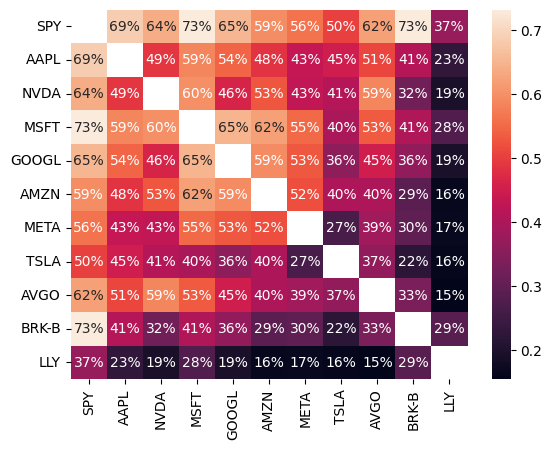

In [10]:
corrmat = rets.corr()
corrmat[corrmat==1] = None
sns.heatmap(corrmat,annot=True,fmt='.0%');

In [11]:
corr_rank = corrmat.unstack().sort_values().dropna()
pair_max = corr_rank.index[-1]
pair_min = corr_rank.index[0]

print(f'MIN Correlation pair is {pair_min}')
print(f'MAX Correlation pair is {pair_max}')

MIN Correlation pair is ('LLY', 'AVGO')
MAX Correlation pair is ('SPY', 'MSFT')


Just from the correlation matrix, we can anticipate that the optimizer will...
* reduce weight of `SPY` for its high correlations to the majority of the stocks. 
* increase weight of `LLY` and `BRK` for their extremely low cross correlations.

Below, we see that `SPY` is massively short and `BRK` is massively long.

### **<span style="color:red">Solution 2.2</span>**

In [12]:
def optimized_weights(returns,dropna=True,scale_cov=1):
    if dropna:
        returns = returns.dropna()

    covmat_full = returns.cov()
    covmat_diag = np.diag(np.diag(covmat_full))
    covmat = scale_cov * covmat_full + (1-scale_cov) * covmat_diag

    weights = np.linalg.solve(covmat,returns.mean())
    weights = weights / weights.sum()

    if returns.mean() @ weights < 0:
        weights = -weights

    return pd.DataFrame(weights, index=returns.columns)

In [13]:
wts = pd.DataFrame(index=rets.columns)
wts['optimized weights'] = optimized_weights(rets)

In [14]:
wts['optimized weights'].sort_values(ascending=False)

BRK-B    3.084359
LLY      1.202377
NVDA     1.067801
MSFT     0.859136
AVGO     0.645620
AMZN     0.536354
AAPL     0.477018
META     0.385017
TSLA     0.337308
GOOGL    0.298598
SPY     -7.893588
Name: optimized weights, dtype: float64

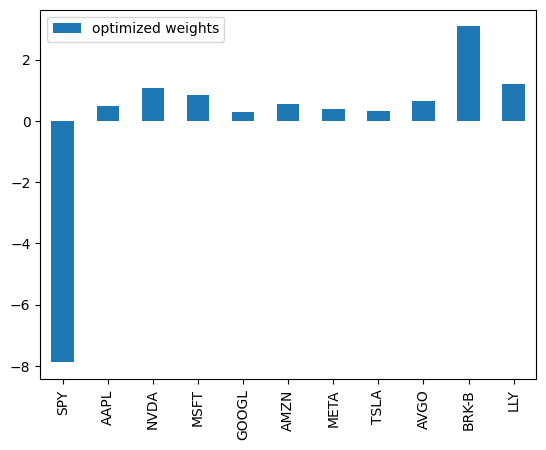

In [15]:
wts.plot.bar();

### **<span style="color:red">Solution 2.3</span>**

In [16]:
port = pd.DataFrame(rets @ wts['optimized weights'],columns=['optimized weights'])
performanceMetrics(port,annualization=FREQ)

,Mean,Vol,Sharpe,Min,Max
optimized weights,1.545781,0.723538,2.136419,-0.315521,0.373921


### **<span style="color:red">Solution 2.4</span>**

In [17]:
sharpe_vs_wts = pd.concat([wts['optimized weights'],mets['Sharpe']],axis=1)
sharpe_vs_wts.sort_values('optimized weights',ascending=False)

,optimized weights,Sharpe
BRK-B,3.084359,0.685508
LLY,1.202377,0.948195
NVDA,1.067801,1.415184
MSFT,0.859136,1.057631
AVGO,0.645620,1.019597
AMZN,0.536354,0.985051
AAPL,0.477018,0.826057
META,0.385017,0.779574
TSLA,0.337308,0.788407
GOOGL,0.298598,0.787376


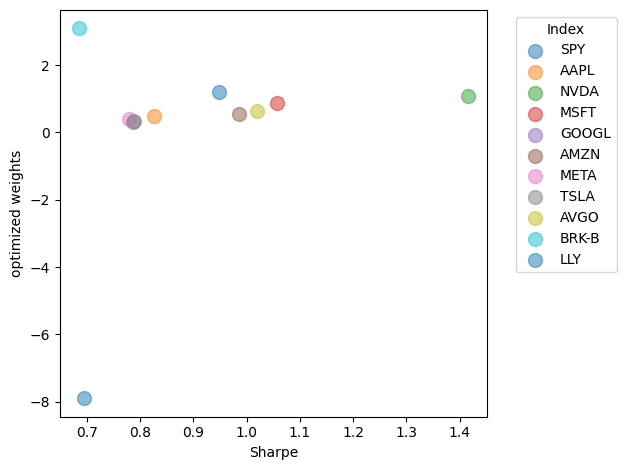

In [18]:
xlabel = 'Sharpe'
ylabel = 'optimized weights'

fig, ax = plt.subplots()

for idx, row in sharpe_vs_wts.iterrows():
    ax.scatter(row[xlabel], row[ylabel], label=str(idx),s=100,alpha=0.5)

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **<span style="color:red">Solution 2.5</span>**

In [19]:
DROPTICK = 'SPY'

In [20]:
wts[f'optimized ex {DROPTICK}'] = optimized_weights(rets.drop(columns=[DROPTICK]))
wts.loc[f'{DROPTICK}',f'optimized ex {DROPTICK}'] = 0

port[f'optimized ex {DROPTICK}'] = pd.DataFrame(rets @ wts[f'optimized ex {DROPTICK}'],columns=[f'optimized ex {DROPTICK}'])

In [21]:
wts[f'optimized ex {DROPTICK}']

SPY      0.000000
AAPL    -0.078166
NVDA     0.370675
MSFT     0.014582
GOOGL   -0.071598
AMZN     0.145160
META     0.028621
TSLA     0.038724
AVGO     0.104653
BRK-B    0.047814
LLY      0.399535
Name: optimized ex SPY, dtype: float64

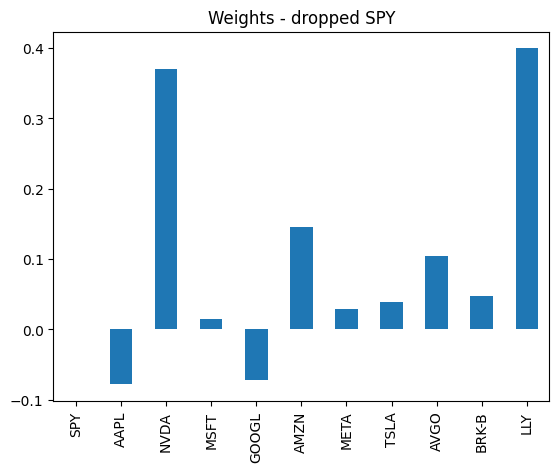

In [22]:
wts[f'optimized ex {DROPTICK}'].plot.bar();
plt.title(f'Weights - dropped {DROPTICK}');

These weights are much more realistic. They are reasonable magnitudes and don't include massive short positions.

Without `SPY`, the correlation matrix has relatively low correlations. Thus, the optimizer doesn't think it can achieve such balanced (hedged) offsets, so it doesn't prescribe extremes. 

In [23]:
performanceMetrics(port,annualization=FREQ)

,Mean,Vol,Sharpe,Min,Max
optimized weights,1.545781,0.723538,2.136419,-0.315521,0.373921
optimized ex SPY,0.435430,0.270785,1.608027,-0.117001,0.151971


### **<span style="color:red">Solution 2.6</span>**

* False. Performance of the tangency portfolio barely changes.
* True. The weights of the tangency portfolio are unstable and change substantially.
* False. This doesn't make sense. Changes in means don't change the correlation.

### **<span style="color:red">Solution 2.7.</span>**

1. The optimization is unrealistic in that it prescribes massive positions.
* `SPY` is short nearly 600%.
* `BRK-B` is long nearly 200%.

1. Harvard uses **constraints** on the positions.

1. Harvard understands that for many assets, the covariance matrix is too ill-conditioned for stable inversion.

***

# 3. Expected Returns

### 3.1.

Consider the CAPM as tested with a single stock,

$$\mathbb{E}\left[r\right] = \beta\,  \mathbb{E}\left[x\right]$$

where
* $r$ denotes the return on `NVDA`, and ETF for U.S. oil
* $x$ denotes the returns on `SPY`, an ETF for USD currency trades.

Estimate the associated regression,
$$r_t = \alpha + \beta x_t + \epsilon_t$$

Report,
* $\alpha$
* $\beta$
* r-squared

Annualize alpha.

### 3.2.

What evidence is there that this (simplistic) factor pricing model does not price `NVDA` correctly?

### 3.3.

What is the (annualized) average excess return of `NVDA`?

According to the CAPM, what level of average excess return is explained by the factor risk?

### 3.4.

Now let's disregard the equilibrium pricing model above, and try calculating the expected return of `NVDA` via forecasting signals. To keep things simple, just use a forecasting regression (rather than a neural network, regression tree, etc.)
$$r_{t+1} = \alpha + \beta x_t + \epsilon_{t+1}$$

We estimate a forecasting regression of `NVDA` on `SPY`.


From this **forecasting** regression, report
* $\alpha$
* $\beta$
* r-squared

### 3.5.

Given the stats in `3.4.`, what do you think of this forecast for `NVDA`? Be specific.

### 3.6.

According to the signal forecasting model, what is the expected return (annualized) of `NVDA` in `July 2025`?

### 3.7.

Why is it important to create style factors which go **long** and **short** the targeted style?

****

# **<span style="color:red">Solution 3</span>**

### **<span style="color:red">3.1.</span>**

In [24]:
YTICK = 'NVDA'
XTICK = 'SPY'

In [25]:
y = rets[[YTICK]]
x = rets[[XTICK]]

mod = get_ols_metrics(x,y,annualization=FREQ)
mod

,alpha,SPY,r-squared,Treynor Ratio,Info Ratio
NVDA,0.449431,1.71686,0.405526,0.380714,1.262048


### **<span style="color:red">3.2.</span>**

The evidence against a factor pricing model is the non-zero alpha. Here the annualized alpha of `45`% says that the expected excess return of `NVDA` is `45`% higher than can be explained by its beta to `SPY`.

### **<span style="color:red">3.3.</span>**

The equilibrium model says that all the expected excess return is due to holding beta risk, and the rest of the mean excess return we observe is the alpha, which could be seen as an error to the model or as an excess return beyond what is earned on risk.

In [26]:
dt = y.index[-1]
expected_return = pd.DataFrame(index=[dt], columns = ['equilibrium','signal forecast'],dtype=float)
expected_return.index.name = 'date'
expected_return.loc[dt,'equilibrium'] = mod.loc[YTICK,XTICK] * x.mean().loc[XTICK] * FREQ

In [27]:
tab_prem = pd.DataFrame(dtype=float,index=['risk-based','alpha'],columns=[YTICK])
tab_prem.loc['risk-based'] = expected_return.loc[dt,'equilibrium']
tab_prem.loc['alpha'] = mod['alpha']
tab_prem

,NVDA
risk-based,0.204202
alpha,0.449431


### **<span style="color:red">3.4.</span>**

In [28]:
y = rets[[YTICK]]
x = rets[[XTICK]].shift(1)

mod = get_ols_metrics(x,y,annualization=FREQ)
mod

,alpha,SPY,r-squared,Treynor Ratio,Info Ratio
NVDA,0.682173,-0.227943,0.007127,-2.876803,1.481074


### **<span style="color:red">3.5.</span>**

The forecast has an r-squared of `0.7%`! So it is not very informative about the target. 

### **<span style="color:red">3.6.</span>**

In [29]:
expected_return.loc[dt,'signal forecast'] = mod.loc[YTICK,'alpha'] + mod.loc[YTICK,XTICK] * rets.loc[dt,XTICK] * FREQ
expected_return

,equilibrium,signal forecast
date,,
2025-06-27,0.204202,0.281449


### **<span style="color:red">3.7.</span>**

The style factors need to be long and short the style to avoid becoming highly correlated to the broad equity factor. For example, a portfolio of value stocks will be highly correlated to the S&P unless we make the basket long value and short growth.

***